# Boring setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

/workspaces/Laboratorio_SiPM/Config/lablib.py:157: SyntaxWarning: invalid escape sequence '\s'
  return pd.read_csv(path, sep='\s+', skiprows = skiprs, header=None, encoding= 'ISO-8859-1', names= titles) # type: ignore


## Funzioni utili

In [2]:
def calculate_distances(vals: list[float], ers: list[float]) -> tuple[list[float], list[float]]:
    distances = []
    errors = []
    for i in range(len(vals)-1):
        distances.append(vals[i+1] - vals[i])

        # per calcolare l'errore della distanza, sommiamo gli errori in quadratura
        # che in questo caso corrisponde alla formula generale di propagazione degli errori
        errors.append(np.sqrt(ers[i]**2 + ers[i+1]**2))

    return distances, errors

def media_pesata(vals: list[float], ers: list[float]) -> tuple[float, float]:
    """
    Calcola la media pesata di una lista di valori con i rispettivi errori.
    Ritorna anche l'errore sulla media.
    """
    if len(vals) != len(ers):
        raise ValueError("Le liste dei valori e degli errori devono avere la stessa lunghezza.")
    
    weights = [1/(e**2) for e in ers]
    weighted_sum = sum(v * w for v, w in zip(vals, weights))
    total_weight = sum(weights)
    
    media = weighted_sum / total_weight if total_weight != 0 else 0.0
    errore = np.sqrt(1/total_weight) if total_weight != 0 else 0.0
    return media, errore

## Gaussiane varie

In [3]:
def gauss(x, mu, sigma, scale):
    return scale * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def seven_gauss_bkg(x, mu1, sigma1, scale1,
                    mu2, sigma2, scale2,
                    mu3, sigma3, scale3,
                    mu4, sigma4, scale4,
                    mu5, sigma5, scale5,
                    mu6, sigma6, scale6,
                    mu7, sigma7, scale7,
                    mu_bkg, sigma_bkg, scale_bkg):
    return (gauss(x, mu1, sigma1, scale1) +
            gauss(x, mu2, sigma2, scale2) +
            gauss(x, mu3, sigma3, scale3) +
            gauss(x, mu4, sigma4, scale4) +
            gauss(x, mu5, sigma5, scale5) +
            gauss(x, mu6, sigma6, scale6) +
            gauss(x, mu7, sigma7, scale7) +
            gauss(x, mu_bkg, sigma_bkg, scale_bkg))

def eight_gauss_bkg(x, mu1, sigma1, scale1,
                    mu2, sigma2, scale2,
                    mu3, sigma3, scale3,
                    mu4, sigma4, scale4,
                    mu5, sigma5, scale5,
                    mu6, sigma6, scale6,
                    mu7, sigma7, scale7,
                    mu8, sigma8, scale8,
                    mu_bkg, sigma_bkg, scale_bkg):
    return (gauss(x, mu1, sigma1, scale1) +
            gauss(x, mu2, sigma2, scale2) +
            gauss(x, mu3, sigma3, scale3) +
            gauss(x, mu4, sigma4, scale4) +
            gauss(x, mu5, sigma5, scale5) +
            gauss(x, mu6, sigma6, scale6) +
            gauss(x, mu7, sigma7, scale7) +
            gauss(x, mu8, sigma8, scale8) +
            gauss(x, mu_bkg, sigma_bkg, scale_bkg))

def ten_gauss_bkg(x, mu1, sigma1, scale1,
                    mu2, sigma2, scale2,
                    mu3, sigma3, scale3,
                    mu4, sigma4, scale4,
                    mu5, sigma5, scale5,
                    mu6, sigma6, scale6,
                    mu7, sigma7, scale7,
                    mu8, sigma8, scale8,
                    mu9, sigma9, scale9,
                    mu10, sigma10, scale10,
                    mu_bkg, sigma_bkg, scale_bkg):
    return (gauss(x, mu1, sigma1, scale1) +
            gauss(x, mu2, sigma2, scale2) +
            gauss(x, mu3, sigma3, scale3) +
            gauss(x, mu4, sigma4, scale4) +
            gauss(x, mu5, sigma5, scale5) +
            gauss(x, mu6, sigma6, scale6) +
            gauss(x, mu7, sigma7, scale7) +
            gauss(x, mu8, sigma8, scale8) +
            gauss(x, mu9, sigma9, scale9) +
            gauss(x, mu10, sigma10, scale10) +
            gauss(x, mu_bkg, sigma_bkg, scale_bkg))



# Analisi grafici pettine

## Acquisizione dati

In [4]:
thr_sequence = 10
thr_noise = 10
thr_errors = 30

root_path = r'Dati/Parte 1/ADC_factor/Nuovi/'
read_data = lambda x: crop_df(read_corretto(root_path + x + '.txt'), thr_sequence, thr_noise)

p53_5 = read_data('53.5')
p54 =   read_data('54')
p54_5 = read_data('54.5')
p55 =   read_data('55')
p55_5 = read_data('55.5')
p56 =   read_data('56')
p56_5 = read_data('56.5')

p53_5['Errors'] = assign_errors(p53_5, thr_errors)
p54['Errors'] =   assign_errors(p54, thr_errors)
p54_5['Errors'] = assign_errors(p54_5, thr_errors)
p55['Errors'] =   assign_errors(p55, thr_errors)
p55_5['Errors'] = assign_errors(p55_5, thr_errors)
p56['Errors'] =   assign_errors(p56, thr_errors)
p56_5['Errors'] = assign_errors(p56_5, thr_errors)

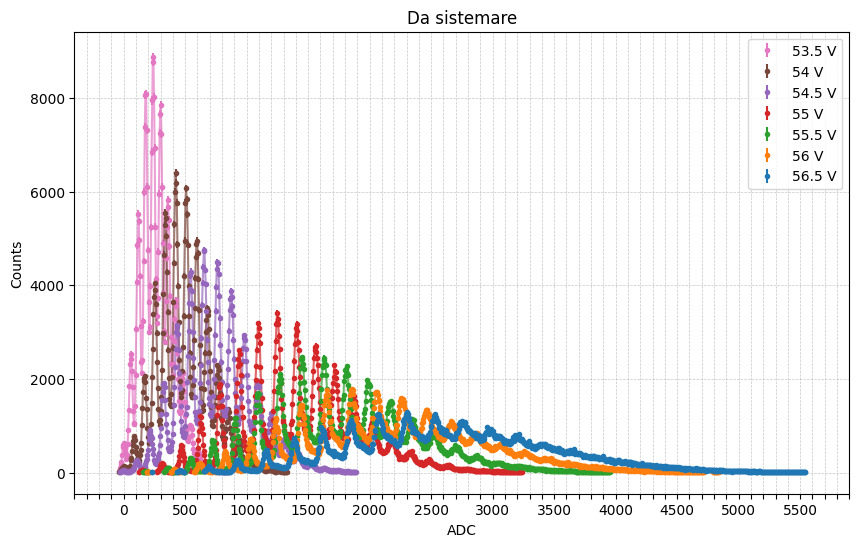

In [5]:
# plot di tutte le curve

displays = range(7)

plt.figure(figsize=(10, 6))

if 0 in displays:
    plt.errorbar(p53_5['ADC'], p53_5['Counts'], yerr=p53_5['Errors'], label='53.5 V', color='#e377c2', marker='.', linestyle='none')
    plt.plot(p53_5['ADC'], p53_5['Counts'], color='#e377c2', alpha=0.7)
if 1 in displays:
    plt.errorbar(p54['ADC'], p54['Counts'], yerr=p54['Errors'], label='54 V', color="#79463c", marker='.', linestyle='none')
    plt.plot(p54['ADC'], p54['Counts'], color="#79463c", alpha=0.7)
if 2 in displays:
    plt.errorbar(p54_5['ADC'], p54_5['Counts'], yerr=p54_5['Errors'], label='54.5 V', color='#9467bd', marker='.', linestyle='none')
    plt.plot(p54_5['ADC'], p54_5['Counts'], color='#9467bd', alpha=0.7)
if 3 in displays:
    plt.errorbar(p55['ADC'], p55['Counts'], yerr=p55['Errors'], label='55 V', color='#d62728', marker='.', linestyle='none')
    plt.plot(p55['ADC'], p55['Counts'], color='#d62728', alpha=0.7)
if 4 in displays:
    plt.errorbar(p55_5['ADC'], p55_5['Counts'], yerr=p55_5['Errors'], label='55.5 V', color='#2ca02c', marker='.', linestyle='none')
    plt.plot(p55_5['ADC'], p55_5['Counts'], color='#2ca02c', alpha=0.7)
if 5 in displays:
    plt.errorbar(p56['ADC'], p56['Counts'], yerr=p56['Errors'], label='56 V', color='#ff7f0e', marker='.', linestyle='none')
    plt.plot(p56['ADC'], p56['Counts'], color='#ff7f0e', alpha=0.7)
if 6 in displays:
    plt.errorbar(p56_5['ADC'], p56_5['Counts'], yerr=p56_5['Errors'], label='56.5 V', color='#1f77b4', marker='.', linestyle='none')
    plt.plot(p56_5['ADC'], p56_5['Counts'], color='#1f77b4', alpha=0.7)

plt.xlabel('ADC')
plt.ylabel('Counts')
plt.title("Da sistemare")
plt.legend()
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Tick ogni 100, ma mostra solo alcuni valori come etichetta
ticks = np.arange(int(plt.xlim()[0]//100*100), int(plt.xlim()[1])+100, 100)
plt.xticks(ticks, ['' if i % 500 != 0 else str(int(i)) for i in ticks])  # mostra solo ogni 500

plt.show()

__Commento__ \
Per gli errori uso la soluzione che abbiamo discusso in precedenza

## Analisi 53.5

In [6]:
par53_5, val53_5, err53_5, pval53_5, dof53_5, csq53_5, *other53_5 = LS_fit(p53_5['ADC'], p53_5['Counts'], p53_5['Errors'], seven_gauss_bkg,
                                                                mu1=60, sigma1=10, scale1=2000,
                                                                mu2=120, sigma2=10, scale2=4000,
                                                                mu3=180, sigma3=10, scale3=8000,
                                                                mu4=240, sigma4=10, scale4=8000,
                                                                mu5=300, sigma5=10, scale5=8000,
                                                                mu6=360, sigma6=10, scale6=6000,
                                                                mu7=420, sigma7=10, scale7=4000,
                                                                mu_bkg=300, sigma_bkg=150, scale_bkg=2000,
                                                                disp=0)
# L'immagine del fit non e' corretta, ma il fit e' buono
# t = np.linspace(0, 600, 1000)
# plt.plot(t, seven_gauss_bkg(t, *val53_5), label='Fit 53.5 V', color='#e377c2')
# plt.errorbar(p53_5['ADC'], p53_5['Counts'], yerr=p53_5['Errors'], label='Dati 53.5 V', color='#e377c2', marker='.', linestyle='none')

if 0:
    for i in range(len(par53_5)):
        print(f"parametro {par53_5[i]}: {val53_5[i]:.5g} ± {err53_5[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq53_5/dof53_5:.5g}")
    print(f"p-value: {pval53_5:.5g}")

In [7]:
# Calcolo distanze tra picchi con media pesata

peaks53_5 = [val53_5[i] for i in range(len(val53_5)) if i % 3 == 0 and i < len(val53_5) - 3]
errs53_5 = [val53_5[i+1] for i in range(len(val53_5)) if i % 3 == 0 and i < len(val53_5) - 3] # sigma delle gaussiane

dist53_5, err_dist53_5 = calculate_distances(peaks53_5, errs53_5)
mean_53_5, err_mean53_5 = media_pesata(dist53_5, err_dist53_5)

print(f'Distanza media 53.5 V: {mean_53_5:.5g} ± {err_mean53_5:.5g}')

Distanza media 53.5 V: 60.763 ± 7.4544


## Analisi 54

In [8]:
par54, val54, err54, pval54, dof54, csq54, *other54 = LS_fit(p54['ADC'], p54['Counts'], p54['Errors'], eight_gauss_bkg,
                                                                mu1=160, sigma1=10, scale1=2000,
                                                                mu2=250, sigma2=10, scale2=4000,
                                                                mu3=340, sigma3=10, scale3=6000,
                                                                mu4=430, sigma4=10, scale4=6000,
                                                                mu5=520, sigma5=10, scale5=6000,
                                                                mu6=600, sigma6=10, scale6=5000,
                                                                mu7=690, sigma7=10, scale7=3000,
                                                                mu8=780, sigma8=10, scale8=2000,
                                                                mu_bkg=550, sigma_bkg=300, scale_bkg=2000,
                                                                disp=0)

if 0:
    for i in range(len(par54)):
        print(f"parametro {par54[i]}: {val54[i]:.5g} ± {err54[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq54/dof54:.5g}")
    print(f"p-value: {pval54:.5g}")

In [9]:
peaks54 = [val54[i] for i in range(len(val54)) if i % 3 == 0 and i < len(val54) - 3]
errs54 = [val54[i+1] for i in range(len(val54)) if i % 3 == 0 and i < len(val54) - 3]

dist54, err_dist54 = calculate_distances(peaks54, errs54)
mean_54, err_mean54 = media_pesata(dist54, err_dist54)

print(f'Distanza media 54 V: {mean_54:.5g} ± {err_mean54:.5g}')

Distanza media 54 V: 85.383 ± 8.3965


## Analisi 54.5

In [10]:
par54_5, val54_5, err54_5, pval54_5, dof54_5, csq54_5, *other54_5 = LS_fit(p54_5['ADC'], p54_5['Counts'], p54_5['Errors'], ten_gauss_bkg,
                                                                            mu1=210, sigma1=10, scale1=1000,
                                                                            mu2=320, sigma2=10, scale2=2000,
                                                                            mu3=430, sigma3=10, scale3=3000,
                                                                            mu4=540, sigma4=10, scale4=4000,
                                                                            mu5=650, sigma5=10, scale5=4000,
                                                                            mu6=760, sigma6=10, scale6=4000,
                                                                            mu7=870, sigma7=10, scale7=4000,
                                                                            mu8=980, sigma8=10, scale8=3000,
                                                                            mu9=1090, sigma9=10, scale9=2000,
                                                                            mu10=1200, sigma10=10, scale10=1000,
                                                                            mu_bkg=800, sigma_bkg=400, scale_bkg=2000,
                                                                            disp=0)

if 0:
    for i in range(len(par54_5)):
        print(f"parametro {par54_5[i]}: {val54_5[i]:.5g} ± {err54_5[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq54_5/dof54_5:.5g}")
    print(f"p-value: {pval54_5:.5g}")

In [11]:
peaks54_5 = [val54_5[i] for i in range(len(val54_5)) if i % 3 == 0 and i < len(val54_5) - 3]
errs54_5 = [val54_5[i+1] for i in range(len(val54_5)) if i % 3 == 0 and i < len(val54_5) - 3]

dist54_5, err_dist54_5 = calculate_distances(peaks54_5, errs54_5)
mean_54_5, err_mean54_5 = media_pesata(dist54_5, err_dist54_5)

print(f'Distanza media 54.5 V: {mean_54_5:.5g} ± {err_mean54_5:.5g}')

Distanza media 54.5 V: 109.37 ± 8.862


## Analisi 55

In [12]:
par55, val55, err55, pval55, dof55, csq55, *other55 = LS_fit(p55['ADC'], p55['Counts'], p55['Errors'], ten_gauss_bkg,
                                                                mu1=450, sigma1=10, scale1=500,
                                                                mu2=620, sigma2=10, scale2=1000,
                                                                mu3=790, sigma3=10, scale3=2000,
                                                                mu4=940, sigma4=10, scale4=2500,
                                                                mu5=1090, sigma5=10, scale5=3000,
                                                                mu6=1250, sigma6=10, scale6=3000,
                                                                mu7=1400, sigma7=10, scale7=3000,
                                                                mu8=1550, sigma8=10, scale8=2500,
                                                                mu9=1710, sigma9=10, scale9=2000,
                                                                mu10=1860, sigma10=10, scale10=1500,
                                                                mu_bkg=1500, sigma_bkg=600, scale_bkg=2000,
                                                                disp=0)

if 0:
    for i in range(len(par55)):
        print(f"parametro {par55[i]}: {val55[i]:.5g} ± {err55[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq55/dof55:.5g}")
    print(f"p-value: {pval55:.5g}")

In [13]:
peaks55 = [val55[i] for i in range(len(val55)) if i % 3 == 0 and i < len(val55) - 3]
errs55 = [val55[i+1] for i in range(len(val55)) if i % 3 == 0 and i < len(val55) - 3]

dist55, err_dist55 = calculate_distances(peaks55, errs55)
mean_55, err_mean55 = media_pesata(dist55, err_dist55)

print(f'Distanza media 55 V: {mean_55:.5g} ± {err_mean55:.5g}')

Distanza media 55 V: 155.91 ± 9.5286


## Analisi 55.5

In [14]:
par55_5, val55_5, err55_5, pval55_5, dof55_5, csq55_5, *other55_5 = LS_fit(p55_5['ADC'], p55_5['Counts'], p55_5['Errors'], ten_gauss_bkg,
                                                                mu1=540, sigma1=10, scale1=300,
                                                                mu2=720, sigma2=10, scale2=600,
                                                                mu3=900, sigma3=10, scale3=1200,
                                                                mu4=1080, sigma4=10, scale4=1500,
                                                                mu5=1260, sigma5=10, scale5=2000,
                                                                mu6=1440, sigma6=10, scale6=2500,
                                                                mu7=1620, sigma7=10, scale7=2500,
                                                                mu8=1800, sigma8=10, scale8=2000,
                                                                mu9=1980, sigma9=10, scale9=2000,
                                                                mu10=2160, sigma10=10, scale10=1500,
                                                                mu_bkg=1800, sigma_bkg=600, scale_bkg=2000,
                                                                disp=0)

if 0:
    for i in range(len(par55_5)):
        print(f"parametro {par55_5[i]}: {val55_5[i]:.5g} ± {err55_5[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq55_5/dof55_5:.5g}")
    print(f"p-value: {pval55_5:.5g}")

In [15]:
peaks55_5 = [val55_5[i] for i in range(len(val55_5)) if i % 3 == 0 and i < len(val55_5) - 3]
errs55_5 = [val55_5[i+1] for i in range(len(val55_5)) if i % 3 == 0 and i < len(val55_5) - 3]

dist55_5, err_dist55_5 = calculate_distances(peaks55_5, errs55_5)
mean_55_5, err_mean55_5 = media_pesata(dist55_5, err_dist55_5)

print(f'Distanza media 55.5 V: {mean_55_5:.5g} ± {err_mean55_5:.5g}')

Distanza media 55.5 V: 180.77 ± 10.167


## Analisi 56

In [16]:
par56, val56, err56, pval56, dof56, csq56, *other56 = LS_fit(p56['ADC'], p56['Counts'], p56['Errors'], ten_gauss_bkg,
                                                                mu1=810, sigma1=10, scale1=500,
                                                                mu2=1020, sigma2=10, scale2=750,
                                                                mu3=1230, sigma3=10, scale3=1000,
                                                                mu4=1440, sigma4=10, scale4=1500,
                                                                mu5=1650, sigma5=10, scale5=1750,
                                                                mu6=1860, sigma6=10, scale6=1750,
                                                                mu7=2070, sigma7=10, scale7=1750,
                                                                mu8=2280, sigma8=10, scale8=1500,
                                                                mu9=2480, sigma9=10, scale9=1250,
                                                                mu10=2680, sigma10=10, scale10=1250,
                                                                mu_bkg=2400, sigma_bkg=700, scale_bkg=800,
                                                                disp=0)

if 0:
    for i in range(len(par56)):
        print(f"parametro {par56[i]}: {val56[i]:.5g} ± {err56[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq56/dof56:.5g}")
    print(f"p-value: {pval56:.5g}")

In [17]:
peaks56 = [val56[i] for i in range(len(val56)) if i % 3 == 0 and i < len(val56) - 3]
errs56 = [val56[i+1] for i in range(len(val56)) if i % 3 == 0 and i < len(val56) - 3]

dist56, err_dist56 = calculate_distances(peaks56, errs56)
mean_56, err_mean56 = media_pesata(dist56, err_dist56)

print(f'Distanza media 56 V: {mean_56:.5g} ± {err_mean56:.5g}')

Distanza media 56 V: 205.14 ± 11.749


## Analisi 56.5

__Commento__ \
Sono tornato ad usare la funzione a 8 gaussiane poiche' il bkg e' diventato parecchio alto verso la fine

In [18]:
pars56_5, val56_5, err56_5, pval56_5, dof56_5, csq56_5, *other56_5 = LS_fit(p56_5['ADC'], p56_5['Counts'], p56_5['Errors'], eight_gauss_bkg,
                                                                mu1=910, sigma1=10, scale1=200,
                                                                mu2=1150, sigma2=10, scale2=400,
                                                                mu3=1390, sigma3=10, scale3=600,
                                                                mu4=1600, sigma4=10, scale4=1000,
                                                                mu5=1850, sigma5=10, scale5=1100,
                                                                mu6=2050, sigma6=10, scale6=1200,
                                                                mu7=2300, sigma7=10, scale7=1200,
                                                                mu8=2550, sigma8=10, scale8=1000,
                                                                mu_bkg=2200, sigma_bkg=500, scale_bkg=800,
                                                                disp=0)

if 0:
    for i in range(len(pars56_5)):
        print(f"parametro {pars56_5[i]}: {val56_5[i]:.5g} ± {err56_5[i]:.5g}")

    print("----------")
    print(f"chi2 ridotto: {csq56_5/dof56_5:.5g}")
    print(f"p-value: {pval56_5:.5g}")

In [19]:
peaks56_5 = [val56_5[i] for i in range(len(val56_5)) if i % 3 == 0 and i < len(val56_5) - 3]
errs56_5 = [val56_5[i+1] for i in range(len(val56_5)) if i % 3 == 0 and i < len(val56_5) - 3]

dist56_5, err_dist56_5 = calculate_distances(peaks56_5, errs56_5)
mean_56_5, err_mean56_5 = media_pesata(dist56_5, err_dist56_5)

print(f'Distanza media 56.5 V: {mean_56_5:.5g} ± {err_mean56_5:.5g}')

Distanza media 56.5 V: 230.08 ± 13.392


# Analisi distanze medie

In [20]:
def linear(x, m, q):
    return m * x + q

x = np.array([53.5, 54, 54.5, 55, 55.5, 56, 56.5])
means = np.array([mean_53_5, mean_54, mean_54_5, mean_55, mean_55_5, mean_56, mean_56_5])
means_err = np.array([err_mean53_5, err_mean54, err_mean54_5, err_mean55, err_mean55_5, err_mean56, err_mean56_5])

pars_mean, val_mean, err_mean, *other_mean = LS_fit(x, means, means_err, linear, m=0.1, q=0.1, disp=0)

chi2_rid = other_mean[2] / other_mean[1]
print(f'Chi quadrato ridotto per fit lineare: {chi2_rid:.5g}')

Chi quadrato ridotto per fit lineare: 0.45025


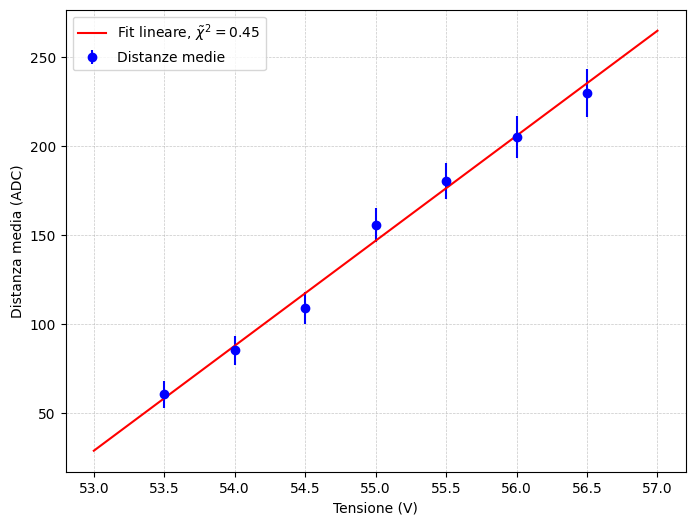

In [23]:
t = np.linspace(53, 57, 100)

plt.figure(figsize=(8, 6))
plt.errorbar(x, means, yerr=means_err, label='Distanze medie', color='blue', marker='o', linestyle='none')
plt.plot(t, linear(t, *val_mean), label=fr'Fit lineare, $\tilde\chi^2 = {chi2_rid:.3g}$', color='red')

plt.xlabel('Tensione (V)')
plt.ylabel('Distanza media (ADC)')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [22]:
# Calcolo intercetta per tensione di breakdown

breakdown_voltage = -val_mean[1] / val_mean[0]
bdv_err = np.abs(breakdown_voltage) * np.sqrt((err_mean[1] / val_mean[1])**2 + (err_mean[0] / val_mean[0])**2)

print(f'Tensione di breakdown: {breakdown_voltage:.5g} ± {bdv_err:.5g} V')

Tensione di breakdown: 52.507 ± 4.8372 V


<span style="color:red">**Triste commento**</span> \
Come si puo' vedere ci sono 2 rette diverse nel grafico, visto che abbiamo preso le prime 3 misure e le ultime 4 in due giorni diversi